#Introduction
In this jupyter notebook I wanted to see the difference between handling differents smiliar datasets. This one deals with brooklyn house prices. In this notebook I mainly test out how to deal with extracting specific categories you want to test out of data.

#Setting up the data

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
data = pd.read_csv('/content/drive/MyDrive/Year 4/Data Science And Machine Learning/Project/brooklyn House Price Predictor/brooklyn_sales_map.csv')
homesInGreenpoint = data[data['neighborhood'] == 'GREENPOINT']
homesInGreenpointLowTax = homesInGreenpoint[homesInGreenpoint['tax_class'] == "1"]
data2 = homesInGreenpointLowTax[homesInGreenpointLowTax["building_class_category"] == "01 ONE FAMILY HOMES"]
x = data2[['year_of_sale']] # Sets x axis as square footage
y = data2['sale_price'] # Sets y as price
data2.head()
#Above I narrowed the data down to low income single family house in the
#greenpoint neighbourhood of brooklyn, this reduced the amount of rows to only 111

<ipython-input-1-e2495919c229>:5: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Year 4/Data Science And Machine Learning/Project/Boston House Price Predictor/brooklyn_sales_map.csv')


,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
3854,3855,3,GREENPOINT,01 ONE FAMILY HOMES,1,2532,46,NaN,S1,975 MANHATTAN AVENUE,...,E-232,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,260.551630,2824.381736
4928,4929,3,GREENPOINT,01 ONE FAMILY HOMES,1,2571,28,NaN,A9,85 CALYER STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,272.757476,3573.672233
7525,7526,3,GREENPOINT,01 ONE FAMILY HOMES,1,2648,14,NaN,A9,175 ECKFORD STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,236.142431,1669.166554
7662,7663,3,GREENPOINT,01 ONE FAMILY HOMES,1,2688,80,NaN,A4,172 MONITOR STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,230.255274,1225.651989
9047,9048,3,GREENPOINT,01 ONE FAMILY HOMES,1,2569,48,NaN,A3,1093 LORIMER STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,184.000262,1280.655387


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-2-444997ff90a3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#Simple Linear Regression

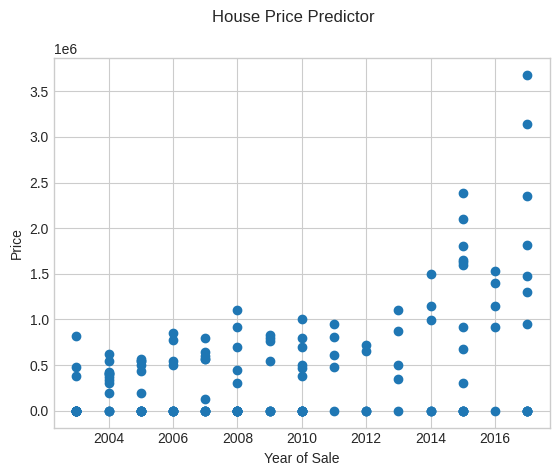

In [ ]:
plt.suptitle('House Price Predictor') # Title of graph
plt.xlabel('Year of Sale') # Label for x axis
plt.ylabel('Price') # Label for y axis
plt.scatter(x,y) # Plots all the scatter points
plt.show()

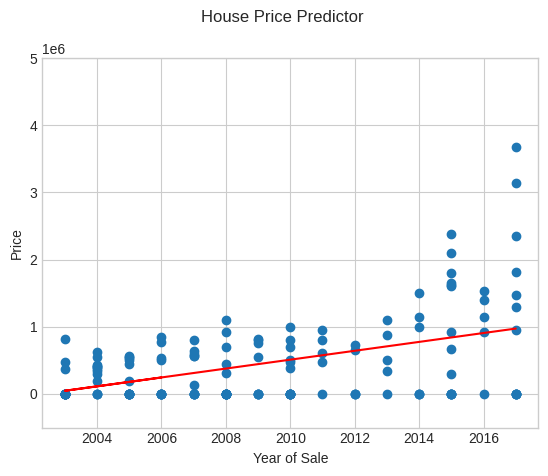

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x) #Sets variable that predicts the y axis

plt.suptitle('House Price Predictor')
plt.xlabel('Year of Sale')
plt.ylabel('Price')
plt.scatter(x,y)
plt.ylim((-500000, 5000000))
plt.plot(x,yPredict, color='red', label='Regression line') #Plots the regression line
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y,yPredict) #Gets the r2 score
print("R Squared value is : ", r_squared)

R Squared value is :  0.21849982838355564


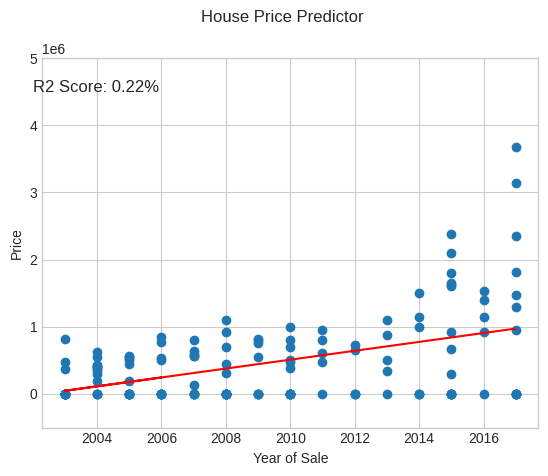

In [ ]:
model = LinearRegression(fit_intercept=True)

model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x) #Sets variable that predicts the y axis

plt.suptitle('House Price Predictor')
plt.xlabel('Year of Sale')
plt.ylabel('Price')
plt.scatter(x,y)
plt.ylim((-500000, 5000000))
plt.plot(x,yPredict, color='red', label='Regression line') #Plots the regression line
plt.text(2002, 4500000,f"R2 Score: {round(r_squared,2)}%",fontsize=12)
plt.show()

#Polynomial Functions

In [ ]:
print(y)

3854      3680000.0
4928      3140000.0
7525      2380000.0
7662      2350000.0
9047      2100000.0
            ...    
380985          0.0
380989          0.0
380990     540000.0
380991     850000.0
380992          0.0
Name: sale_price, Length: 149, dtype: float64


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False) #degree set to 3, supports
#up to cubic functions
poly.fit_transform(x) #Transforms x into 3d array

array([[2.017000e+03, 4.068289e+06],
       [2.017000e+03, 4.068289e+06],
       [2.015000e+03, 4.060225e+06],
       [2.017000e+03, 4.068289e+06],
       [2.015000e+03, 4.060225e+06],
       [2.017000e+03, 4.068289e+06],
       [2.015000e+03, 4.060225e+06],
       [2.015000e+03, 4.060225e+06],
       [2.015000e+03, 4.060225e+06],
       [2.015000e+03, 4.060225e+06],
       [2.016000e+03, 4.064256e+06],
       [2.014000e+03, 4.056196e+06],
       [2.017000e+03, 4.068289e+06],
       [2.016000e+03, 4.064256e+06],
       [2.017000e+03, 4.068289e+06],
       [2.014000e+03, 4.056196e+06],
       [2.016000e+03, 4.064256e+06],
       [2.013000e+03, 4.052169e+06],
       [2.008000e+03, 4.032064e+06],
       [2.010000e+03, 4.040100e+06],
       [2.014000e+03, 4.056196e+06],
       [2.011000e+03, 4.044121e+06],
       [2.017000e+03, 4.068289e+06],
       [2.015000e+03, 4.060225e+06],
       [2.016000e+03, 4.064256e+06],
       [2.008000e+03, 4.032064e+06],
       [2.013000e+03, 4.052169e+06],
 

In [ ]:
print(x)

        year_of_sale
3854            2017
4928            2017
7525            2015
7662            2017
9047            2015
...              ...
380985          2006
380989          2006
380990          2006
380991          2006
380992          2006

[149 rows x 1 columns]


In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(10),
                           LinearRegression())

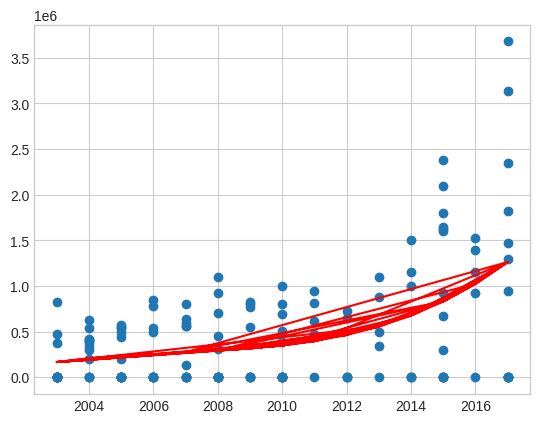

In [ ]:
poly_model.fit(x, y)
yfit = poly_model.predict(x)

plt.scatter(x, y)
plt.plot(x, yfit, color='red');